In [18]:
from os.path import join, basename
from glob import glob
import rioxarray as rxa
import matplotlib.pyplot as plt

In [2]:
data_dir = '/SNOWDATA/IDALS/2021/'
bare_earth = rxa.open_rasterio('/SNOWDATA/IDALS/REF_DEM/DC_REFDEM_WGS84.tif')

In [79]:
# a,b,c,d = [rxa.open_rasterio(f) for f in sorted(glob(join(data_dir, '*_DC/ice-road/*-snowdepth.tif')))][:4]
sds = {}
for f in sorted(glob(join(data_dir, '*_DC/ice-road/*-snowdepth.tif')))[:3]:
    im = rxa.open_rasterio(f)
    im = im.rio.reproject(dst_crs= im.rio.crs, shape = [int(i/10) for i in im.shape[1:]])
    sds[basename(f).split('-')[0]] = im

In [80]:
a,b,c = sds.values()

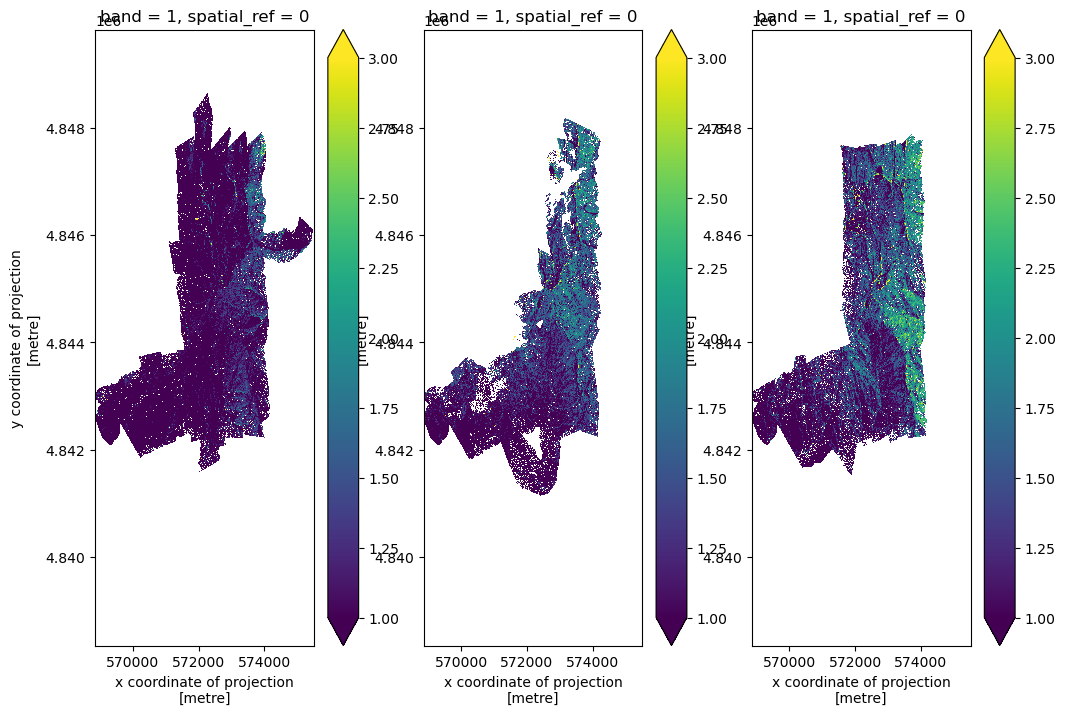

In [81]:
f,axes = plt.subplots(1,3, figsize = (12,8))
a.plot(ax = axes[0], vmax = 3, vmin = 1)
b.plot(ax = axes[1], vmax = 3, vmin = 1)
c.plot(ax = axes[2], vmax = 3, vmin = 1)

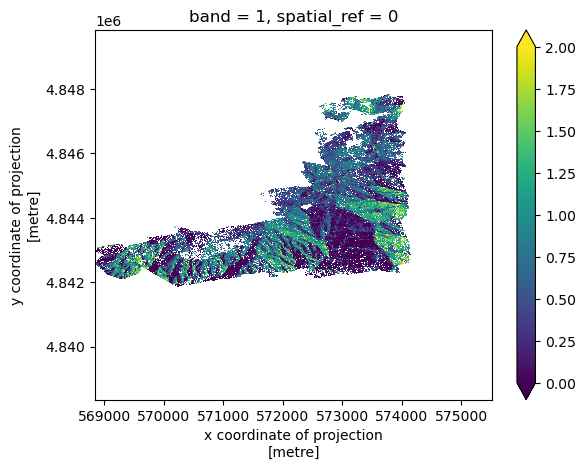

In [85]:
((c-b) + (b-a)).plot(vmin = 0, vmax = 2)

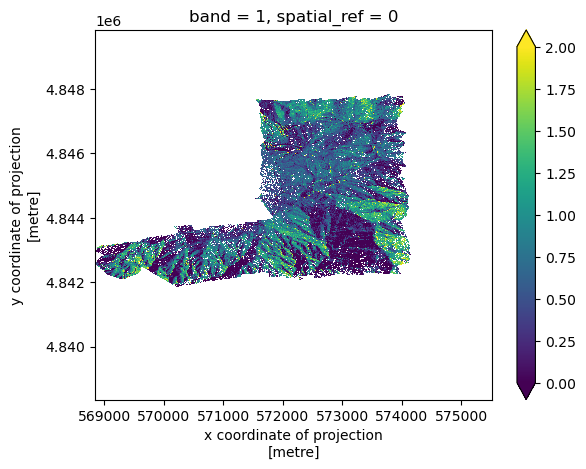

In [84]:
(c-a).plot(vmin = 0, vmax = 2)

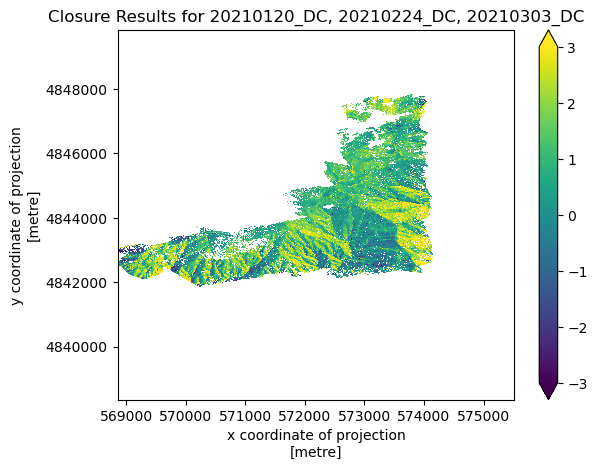

In [88]:
closure = (((b-a) + (c -b )) + (c - a))
closure.where((closure < 10) & (closure > -10)).plot(vmin = -3, vmax = 3)
plt.title('Closure Results for ' + ', '.join(sds.keys()))
plt.gca().ticklabel_format(style='plain')

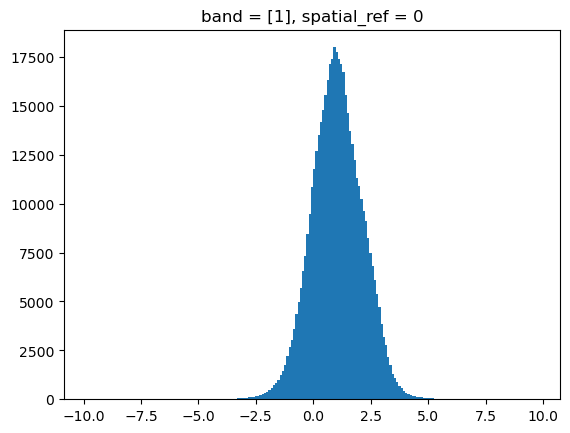

In [89]:
closure.where((closure < 10) & (closure > -10)).plot.hist(bins = 201)
plt.show()